In [1622]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.warnings.filterwarnings('ignore')
from numpy import nan

In [1623]:
df=pd.read_csv("heart_disease.csv")

In [1624]:

df.drop(columns=["Unnamed: 14","Unnamed: 15"],axis=1,inplace=True)
df.head()

,(age),(sex),(cp),(trestbps),(chol),(fbs),(restecg),(thalach),(exang),(oldpeak),(slope),(ca),(thal),(num) (the predicted attribute)
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [1625]:
df.describe()

,(age),(sex),(cp),(restecg),(num) (the predicted attribute)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


Explanation of all the columns:

3 age: age in years

4 sex: sex (1 = male; 0 = female)

9 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

12 chol: serum cholestoral in mg/dl

16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

19 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

32 thalach: maximum heart rate achieved

38 exang: exercise induced angina (1 = yes; 0 = no)

40 oldpeak = ST depression induced by exercise relative to rest

41 slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

44 ca: number of major vessels (0-3) colored by flourosopy

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

58 num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels) The target field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Replacing 0,1,2 as low and 3,4 as high and creating  a column heat condition

In [1626]:
df["(num) (the predicted attribute)"].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: (num) (the predicted attribute), dtype: int64

In [1627]:
hear = ["low","high"]
df['heart_condition'] = pd.cut(df["(num) (the predicted attribute)"], range(-1, 6, 3), right=False, labels=hear)


In [1628]:
df['heart_condition'].value_counts()

low     107
high     93
Name: heart_condition, dtype: int64

In [1629]:
df.columns

Index(['(age)', '(sex)', '(cp)', '(trestbps)', '(chol)', '(fbs)', '(restecg)',
       '(thalach)', '(exang)', ' (oldpeak)', ' (slope)', '(ca)', ' (thal)',
       '(num) (the predicted attribute)', 'heart_condition'],
      dtype='object')

In [1630]:
df.replace(to_replace ="?", 
                 value =nan,inplace=True) 
#replacing all "?" with nan


In [1631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   (age)                            200 non-null    int64   
 1   (sex)                            200 non-null    int64   
 2   (cp)                             200 non-null    int64   
 3   (trestbps)                       144 non-null    object  
 4   (chol)                           193 non-null    object  
 5   (fbs)                            193 non-null    object  
 6   (restecg)                        200 non-null    int64   
 7   (thalach)                        147 non-null    object  
 8   (exang)                          147 non-null    object  
 9    (oldpeak)                       144 non-null    object  
 10   (slope)                         98 non-null     object  
 11  (ca)                             2 non-null      object  
 12   (thal) 

In [1632]:
#dropping columns with more than 100 values as total value in each column is 200
df.drop(columns=["(ca)"," (thal)"],axis=1,inplace=True)


In [1633]:
#converting the object column to integer or float
columns=[" (oldpeak)","(thalach)","(trestbps)","(chol)","(exang)","(fbs)"," (slope)"]
for i in columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# Handling missing data


Median

In [1634]:
#similarly doing it for "(chol)" as it has zero instead of nan
df["(chol)"].replace(to_replace=0,value=nan,inplace=True)

In [1635]:
#for continuos variables (chol),(thalach),(oldpeak),()
columns=[" (oldpeak)","(thalach)","(trestbps)","(chol)"]
for i in columns:
    df[i]=df[i].fillna(df[i].median())


#calculating median of the column and then replacing it with nan 

Mode


In [1636]:
df['(fbs)'].value_counts()

0.0    125
1.0     68
Name: (fbs), dtype: int64

In [1637]:
df['(exang)'].value_counts()

1.0    95
0.0    52
Name: (exang), dtype: int64

In [1638]:
df[' (slope)'].value_counts()

2.0    53
3.0    29
1.0    16
Name:  (slope), dtype: int64

In [1639]:
df['(exang)']=df['(exang)'].fillna(1)
df['(fbs)']=df['(fbs)'].fillna(0)
df[" (slope)"]=df[" (slope)"].fillna(2)

#filling the blank values with highest frequency among the two 

In [1640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   (age)                            200 non-null    int64   
 1   (sex)                            200 non-null    int64   
 2   (cp)                             200 non-null    int64   
 3   (trestbps)                       200 non-null    float64 
 4   (chol)                           200 non-null    float64 
 5   (fbs)                            200 non-null    float64 
 6   (restecg)                        200 non-null    int64   
 7   (thalach)                        200 non-null    float64 
 8   (exang)                          200 non-null    float64 
 9    (oldpeak)                       200 non-null    float64 
 10   (slope)                         200 non-null    float64 
 11  (num) (the predicted attribute)  200 non-null    int64   
 12  heart_co

# Graph Plotting

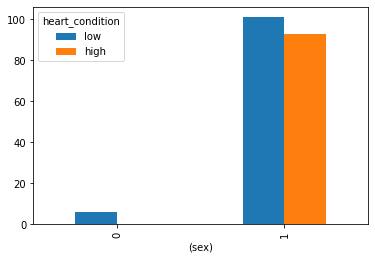

In [1641]:

pd.crosstab(df["(sex)"],df["heart_condition"]).plot(kind='bar')
#we can see that for women it is very low so we can drop this column as all are male

Observation:

For sex column 0=female and 1=male ,we can see that for the female column there is very few cases so we can drop this column
as it wont be much of use.

In [1642]:
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df["(age)"], range(30, 81, 10), right=False, labels=age_labels)
#creating bins for age for visualization

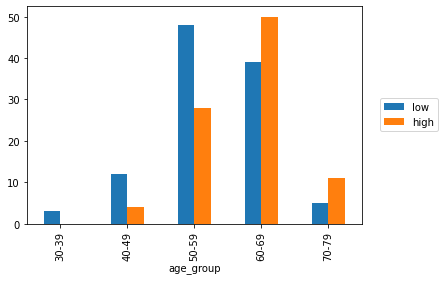

In [1643]:
ax=pd.crosstab(df.age_group,df["heart_condition"]).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

Observation

1. Dividing into bins and plotting ,we find that for the range 30-39 that presence of heart disease is very low

2. For the age group 40-49 also low but few cases of heart 

3. For the age group 50-59 we can see that there is a presence of heart disease which is not that severe .

4. For the age group 60-69 presence of heart disease is high

5. For the age group 70-79 in this also it is high

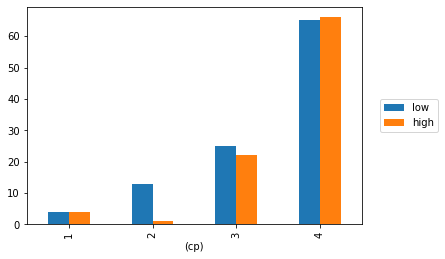

In [1644]:

ax=pd.crosstab(df["(cp)"],df["heart_condition"]).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

Observation

 Value 1: typical angina - In case of this ,heart disease is less 
 
-- Value 2: atypical angina- In this, the value of 0 is more which means heart disease case is less

-- Value 3: non-anginal pain -In this ,the value of 0 is more which means heart disease case is less,however there are few cases of severe heart disease

-- Value 4: asymptomatic- In this we have high people with very value 1 and vey less in 4 

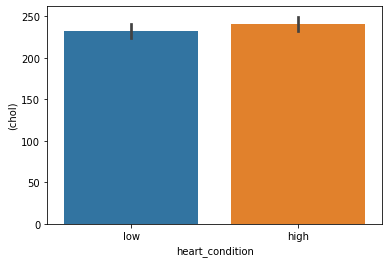

In [1645]:

sns.barplot(x=df["heart_condition"],y=df["(chol)"],data=df)
#both have equal value

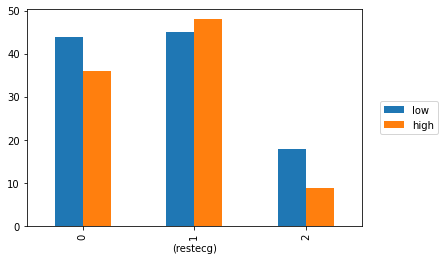

In [1646]:
ax=pd.crosstab(df["(restecg)"],df["heart_condition"]).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

1. We can se people with no heart disease have normal or not very high elevation(value 1)
2. Also for 2-

Value 0: normal -- 
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

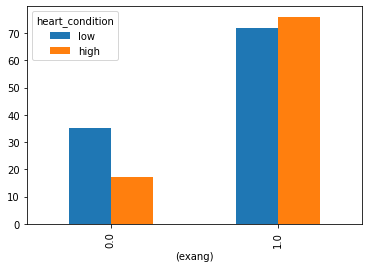

In [1647]:
pd.crosstab(df["(exang)"],df["heart_condition"]).plot(kind='bar')

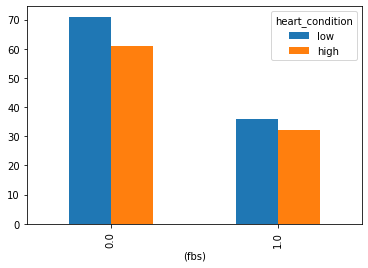

In [1648]:
pd.crosstab(df["(fbs)"],df["heart_condition"]).plot(kind='bar')#we can drop this column also as there is no much difference in the heart condition almost equal

In [1649]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["heart_condition"] = labelencoder.fit_transform(df["heart_condition"])

In [1650]:
corr_matrix=df.corr()
corr_matrix["heart_condition"].sort_values(ascending=False)

heart_condition                    1.000000
(thalach)                          0.057028
(restecg)                          0.034629
(fbs)                             -0.008042
(chol)                            -0.096884
(cp)                              -0.126743
 (slope)                          -0.127050
(trestbps)                        -0.132073
(sex)                             -0.163955
(exang)                           -0.164092
(age)                             -0.293901
 (oldpeak)                        -0.310680
(num) (the predicted attribute)   -0.878850
Name: heart_condition, dtype: float64

In [1651]:
df.drop(columns=["(chol)","age_group",'(num) (the predicted attribute)',"(fbs)","(restecg)"],axis=1,inplace=True)
#dropping the above columns as they have very less correlation laso the graph shows the value are almost equal for all four . 

In [1652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (age)            200 non-null    int64  
 1   (sex)            200 non-null    int64  
 2   (cp)             200 non-null    int64  
 3   (trestbps)       200 non-null    float64
 4   (thalach)        200 non-null    float64
 5   (exang)          200 non-null    float64
 6    (oldpeak)       200 non-null    float64
 7    (slope)         200 non-null    float64
 8   heart_condition  200 non-null    int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 13.4 KB


In [1653]:
df.skew()
#checking the skewness 

(age)             -0.404091
(sex)             -5.552105
(cp)              -1.648734
(trestbps)        -1.320144
(thalach)          0.265689
(exang)           -1.102593
 (oldpeak)         0.259052
 (slope)           0.210521
heart_condition   -0.141407
dtype: float64

In [1654]:
df.shape

(200, 9)

In [1655]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
df =df[(z < 3).all(axis=1)]
df.shape

(181, 9)

In [1656]:
df.skew()

(age)             -0.341400
(sex)              0.000000
(cp)              -1.414098
(trestbps)         0.698089
(thalach)          0.058124
(exang)           -1.207866
 (oldpeak)         0.291281
 (slope)           0.273012
heart_condition   -0.100405
dtype: float64

In [1657]:
from sklearn.preprocessing import power_transform
df_skewed=power_transform(df,method="yeo-johnson")
df=pd.DataFrame(df_skewed,columns=df.columns)
df=df.astype(int)
#removing positive and negative skewness

In [1658]:
df.skew()

(age)              0.138916
(sex)              0.000000
(cp)              -0.860031
(trestbps)        -0.243627
(thalach)          0.131451
(exang)           -1.207866
 (oldpeak)         0.521680
 (slope)          -1.513144
heart_condition   -0.100405
dtype: float64

# BUILDING MODEL
It is a classification problem as we need to find that how severe is the heart disease if present on a scale of 1-4


In [1659]:
df_x=df.drop(columns=['heart_condition'],axis=1)
y=df['heart_condition']
#creating input and output dataframe

In [1660]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
#scaling the input column

In [1661]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [1662]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20)

In [1663]:
model=[LogisticRegression(),DecisionTreeClassifier(),svm.SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is",accuracy_score(y_test,predm,))
    print("Cross val score:",cross_val_score(m,x,y,cv=5,scoring="accuracy").mean())
    print("\n")

Score of LogisticRegression() is 0.7837837837837838
Cross val score: 0.6408408408408409


Score of DecisionTreeClassifier() is 0.40540540540540543
Cross val score: 0.546996996996997


Score of SVC() is 0.5945945945945946
Cross val score: 0.602102102102102


Score of RandomForestClassifier() is 0.43243243243243246
Cross val score: 0.5582582582582583


Score of KNeighborsClassifier() is 0.40540540540540543
Cross val score: 0.624024024024024




In [1664]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x,y)
print("Best Hyper Parameters:\n",grid_search.best_params_)

Best Hyper Parameters:
 {'C': 0.01, 'solver': 'liblinear'}


In [1665]:
model1=LogisticRegression(random_state=42,C= 0.01, solver='liblinear')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
print("Accuracy for Logistic Regression on CV data: ",accuracy_score(y_test,pred))

Accuracy for Logistic Regression on CV data:  0.7837837837837838


In [1670]:
#for boosting the score
from sklearn.ensemble import AdaBoostClassifier
lr=LogisticRegression()
adb=AdaBoostClassifier(base_estimator=model1,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(x,y)
predab=adb.predict(x_test)
print("Score is",accuracy_score(y_test,predab))
print("Cross val score:",cross_val_score(adb,x,y,cv=5,scoring="accuracy").mean())

# summarize results

Score is 0.8108108108108109
Cross val score: 0.63003003003003


In [1671]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix \n",confusion_matrix(y_test,predab))
print("classification report \n",classification_report(y_test,predab))

Confusion matrix 
 [[16  2]
 [ 5 14]]
classification report 
               precision    recall  f1-score   support

          -1       0.76      0.89      0.82        18
           0       0.88      0.74      0.80        19

    accuracy                           0.81        37
   macro avg       0.82      0.81      0.81        37
weighted avg       0.82      0.81      0.81        37



In [1672]:
df_heart=pd.DataFrame(predab)
df_heart.to_csv('Heart_condition.csv') 


In [1673]:
import joblib
joblib.dump(adb,"heart_condition.attrion")

['heart_condition.attrion']